## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import itertools

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images.
train_image = train_images.reshape((-1, 784))
test_image = test_images.reshape((-1, 784))

print(train_image.shape) # (60000, 784)
print(test_image.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [2]:
n=1
train_images[n,:,:].shape

(28, 28)

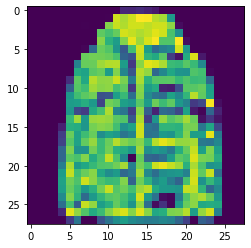

4


In [3]:
n = 2501
plt.imshow(train_images[n,:,:])
plt.show()
print(train_labels[n])

### 1

In [4]:
epochs = 15

epoch = np.arange(epochs+1)

In [5]:
acc_train = {}
acc_test = {}

for i_n in [32, 64, 128, 256]:
    # создаем рабочую модель model 
    model = Sequential([
                      Dense(i_n, activation='relu', input_shape=(784,)),
                      Dense(i_n, activation='relu'),
                      Dense(10, activation='softmax'),
                      ])

    # компилируем model 
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    # проводим обучение модели 
    hh_train = model.fit(
                  train_image,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # вычисляем ошибку для model
    hh_test = model.evaluate(
                  test_image,
                  to_categorical(test_labels),
                  )
    
    acc_train[i_n] = round(hh_train.history['accuracy'][-1], 3)
    acc_test[i_n] = round(hh_test[1], 3)

313/313 [==============================] - 0s 807us/step - loss: 0.3489 - accuracy: 0.8764


In [6]:
print(f'Train accuracy: {acc_train}')
print(f'Test accuracy:  {acc_test}')

Train accuracy: {32: 0.879, 64: 0.899, 128: 0.911, 256: 0.926}
Test accuracy:  {32: 0.854, 64: 0.869, 128: 0.876, 256: 0.876}


Вывод: При увеличении количества нейронов в слое растет точность, но при этом будет и расти время вычислений

### 2

In [7]:
acc_train = {}
acc_test = {}

for i in [2, 3, 5, 10]:
    # создаем рабочую модель model 
    model = Sequential(name='model')
    model.add( Dense(   128, activation='relu', input_shape=(784,)))
    for k in range(i-1):
        model.add(Dense(  128/np.log(i), activation='relu'))
        
    model.add(Dense(10, activation='softmax')) 


    # компилируем model 
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
   
    # проводим обучение модели 
    hh_train = model.fit(
                  train_image,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # вычисляем ошибку для model
    hh_test = model.evaluate(
                  test_image,
                  to_categorical(test_labels),
                  )
    
    acc_train[i] = round(hh_train.history['accuracy'][-1], 3)
    acc_test[i] = round(hh_test[1], 3)

313/313 [==============================] - 0s 862us/step - loss: 0.3766 - accuracy: 0.8687


In [8]:
print(f'Train accuracy: {acc_train}')
print(f'Test accuracy:  {acc_test}')

Train accuracy: {2: 0.91, 3: 0.914, 5: 0.912, 10: 0.902}
Test accuracy:  {2: 0.873, 3: 0.876, 5: 0.872, 10: 0.869}


Вывод: До определенного момента увеличение слоев нейросети качество предсказания повышается. Однако, дальше мы видим существенное ухудшение метрики. Это связано с затуханием градиента, в результате чего первые слои практически перестают обучаться.

### 3

In [9]:
# создаем модель model
model_sample = Sequential([
                      Dense( 128, activation='relu', input_shape=(784,)),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model_sample.save_weights('model.h5')


acc_train = {}
acc_test = {}

# будем изменять оптимизаторы
for i_optim in ['SGD','RMSProp','NAdam','adam']:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    model = Sequential([
                      Dense( 128, activation='relu', input_shape=(784,)),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    model.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    model.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # проводим обучение модели 
    hh_train = model.fit(
                  train_image,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # вычисляем ошибку для model
    hh_test = model.evaluate(
                  test_image,
                  to_categorical(test_labels),
                  )
    
    acc_train[i_optim] = round(hh_train.history['accuracy'][-1], 3)
    acc_test[i_optim] = round(hh_test[1], 3)

313/313 [==============================] - 0s 804us/step - loss: 0.3562 - accuracy: 0.8750


In [10]:
print(f'Train accuracy: {acc_train}')
print(f'Test accuracy:  {acc_test}')

Train accuracy: {'SGD': 0.818, 'RMSProp': 0.895, 'NAdam': 0.91, 'adam': 0.914}
Test accuracy:  {'SGD': 0.805, 'RMSProp': 0.876, 'NAdam': 0.862, 'adam': 0.875}


Для улучшения качества предсказания нейросети требуется работа по подбору всех гиперпараметров (количество нейронов и слоев, выбор вида слоя, выбор правильного оптимизатора, функции активации и проч)

### 4

In [11]:
# Predict
predictions = np.argmax(model.predict(test_image), axis=1)

In [12]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Отчет для класса 0


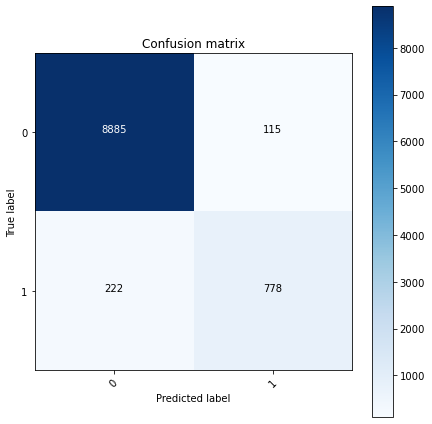

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9000
           1       0.87      0.78      0.82      1000

    accuracy                           0.97     10000
   macro avg       0.92      0.88      0.90     10000
weighted avg       0.97      0.97      0.97     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 1


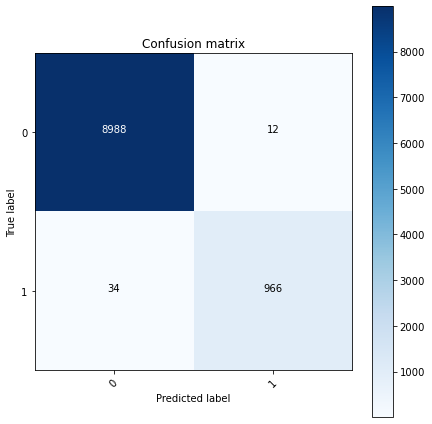

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9000
           1       0.99      0.97      0.98      1000

    accuracy                           1.00     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       1.00      1.00      1.00     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 2


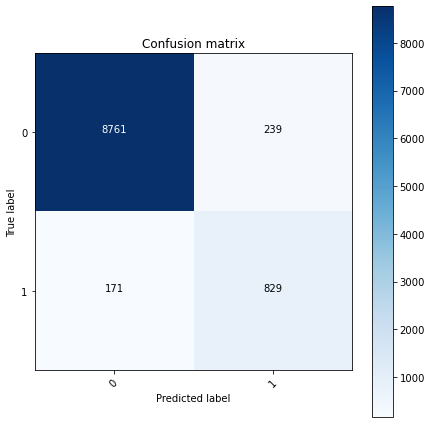

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9000
           1       0.78      0.83      0.80      1000

    accuracy                           0.96     10000
   macro avg       0.88      0.90      0.89     10000
weighted avg       0.96      0.96      0.96     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 3


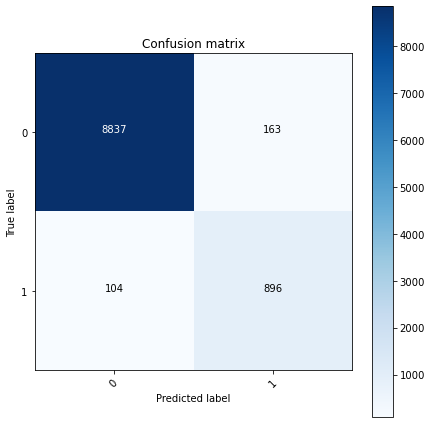

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9000
           1       0.85      0.90      0.87      1000

    accuracy                           0.97     10000
   macro avg       0.92      0.94      0.93     10000
weighted avg       0.97      0.97      0.97     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 4


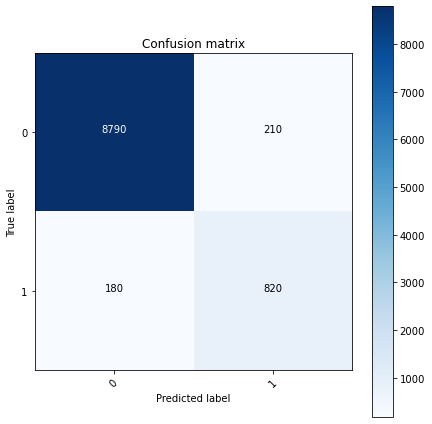

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9000
           1       0.80      0.82      0.81      1000

    accuracy                           0.96     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.96      0.96      0.96     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 5


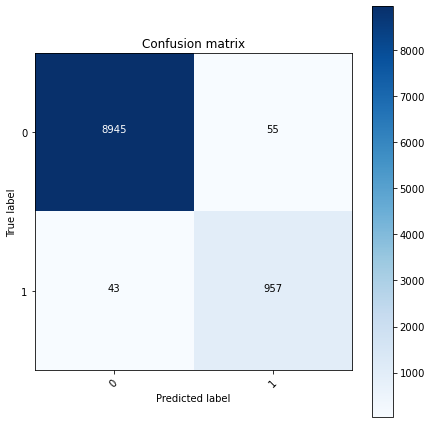

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9000
           1       0.95      0.96      0.95      1000

    accuracy                           0.99     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.99      0.99      0.99     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 6


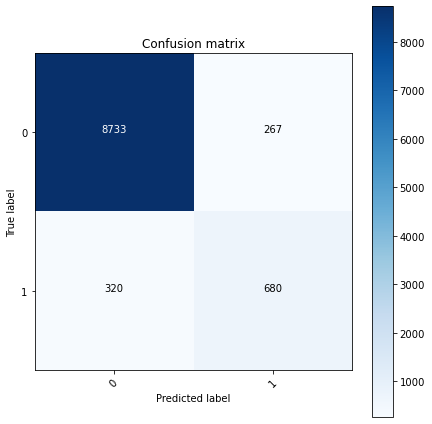

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9000
           1       0.72      0.68      0.70      1000

    accuracy                           0.94     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.94      0.94      0.94     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 7


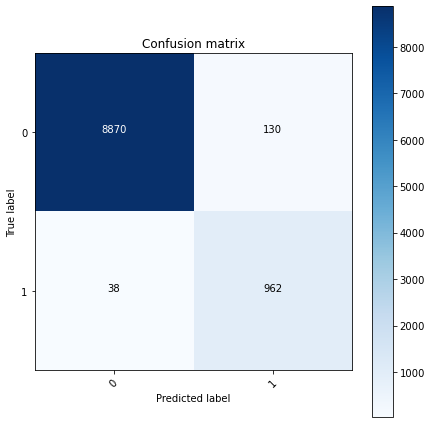

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9000
           1       0.88      0.96      0.92      1000

    accuracy                           0.98     10000
   macro avg       0.94      0.97      0.96     10000
weighted avg       0.98      0.98      0.98     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 8


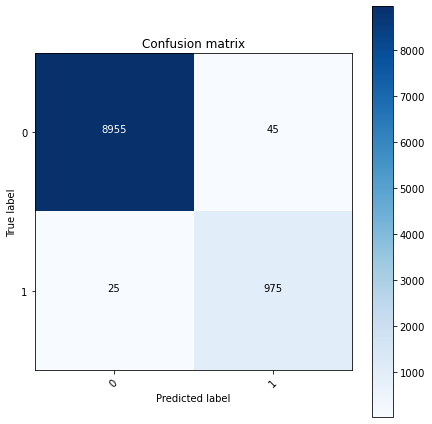

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9000
           1       0.96      0.97      0.97      1000

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++
Отчет для класса 9


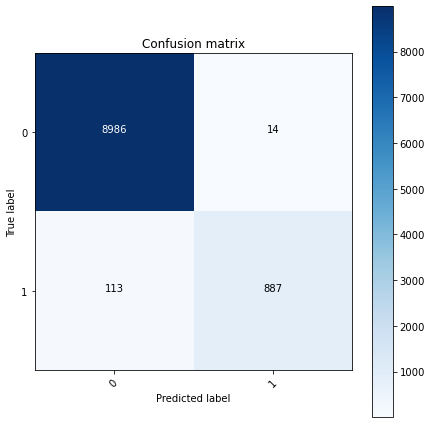

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9000
           1       0.98      0.89      0.93      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.94      0.96     10000
weighted avg       0.99      0.99      0.99     10000

++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [13]:
for i in range(10):
    y_true = [1 if x == i else 0 for x in test_labels]
    preds = [1 if x == i else 0 for x in predictions]
    cm = confusion_matrix(y_true, preds)
    print('======================================================')
    print(f'Отчет для класса {i}')
    print('======================================================')
    plt.figure(figsize=(6, 6))
    plot_confusion_matrix(cm, classes=['0', '1'])
    plt.show()
    print('======================================================')
    print(classification_report(y_true, preds))
    print('======================================================')
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Результаты разнятся для разных классов, то есть некоторые картинки модель лучше классифицирует, чем другие более схожие.
